In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: XOM
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


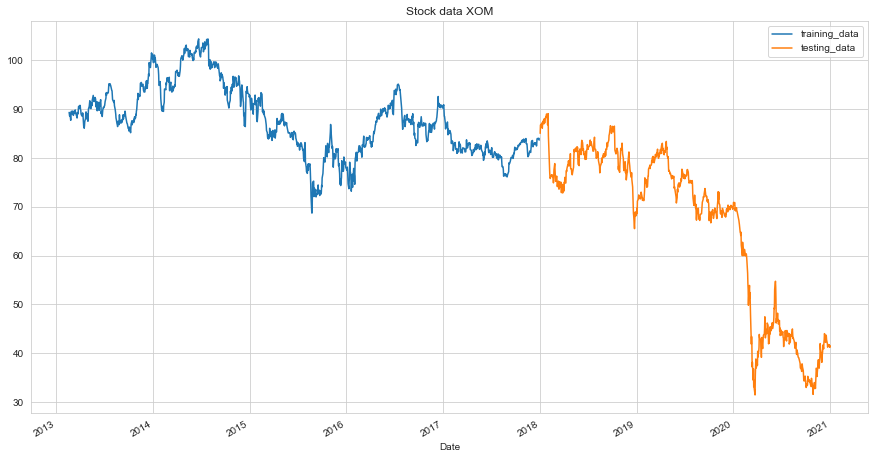

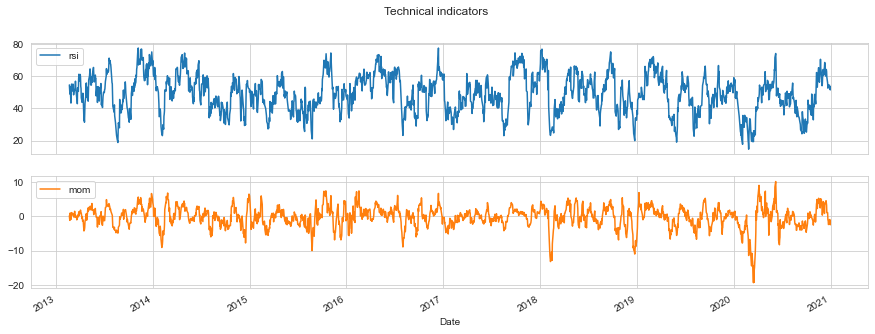

In [10]:
stock_name = 'xom'.upper()
industry = 'Energy'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1075.11, duration: 0:00:00.556126
episode: 2/2000, episode end value: 1054.99, duration: 0:00:00.480108
episode: 3/2000, episode end value: 1050.41, duration: 0:00:00.427098
episode: 4/2000, episode end value: 1058.61, duration: 0:00:00.464105
episode: 5/2000, episode end value: 1111.05, duration: 0:00:00.429096
episode: 6/2000, episode end value: 1090.49, duration: 0:00:00.386087
episode: 7/2000, episode end value: 1033.45, duration: 0:00:00.369084
episode: 8/2000, episode end value: 1054.15, duration: 0:00:00.429096
episode: 9/2000, episode end value: 1041.23, duration: 0:00:00.460106
episode: 10/2000, episode end value: 1052.58, duration: 0:00:00.406093
episode: 11/2000, episode end value: 1064.74, duration: 0:00:00.432097
episode: 12/2000, episode end value: 1060.26, duration: 0:00:00.419095
episode: 13/2000, episode end value: 1068.88, duration: 0:00:00.397087
episode: 14/2000, episode end value: 1045.61, duration: 0:00:00.414091
episode: 15/200

episode: 117/2000, episode end value: 1059.96, duration: 0:00:00.374083
episode: 118/2000, episode end value: 1064.27, duration: 0:00:00.403093
episode: 119/2000, episode end value: 1072.84, duration: 0:00:00.412089
episode: 120/2000, episode end value: 1048.37, duration: 0:00:00.427098
episode: 121/2000, episode end value: 1058.87, duration: 0:00:00.442099
episode: 122/2000, episode end value: 1048.22, duration: 0:00:00.433569
episode: 123/2000, episode end value: 1050.00, duration: 0:00:00.407095
episode: 124/2000, episode end value: 1071.63, duration: 0:00:00.364081
episode: 125/2000, episode end value: 1045.73, duration: 0:00:00.431096
episode: 126/2000, episode end value: 1051.08, duration: 0:00:00.422094
episode: 127/2000, episode end value: 1071.19, duration: 0:00:00.390087
episode: 128/2000, episode end value: 1034.78, duration: 0:00:00.356082
episode: 129/2000, episode end value: 1077.81, duration: 0:00:00.380087
episode: 130/2000, episode end value: 1038.23, duration: 0:00:00

episode: 231/2000, episode end value: 1057.40, duration: 0:00:00.372085
episode: 232/2000, episode end value: 1045.56, duration: 0:00:00.370089
episode: 233/2000, episode end value: 1021.35, duration: 0:00:00.378083
episode: 234/2000, episode end value: 1051.34, duration: 0:00:00.368082
episode: 235/2000, episode end value: 1060.87, duration: 0:00:00.380088
episode: 236/2000, episode end value: 1053.51, duration: 0:00:00.397090
episode: 237/2000, episode end value: 1087.03, duration: 0:00:00.363082
episode: 238/2000, episode end value: 1034.15, duration: 0:00:00.399089
episode: 239/2000, episode end value: 1047.72, duration: 0:00:00.395087
episode: 240/2000, episode end value: 1034.67, duration: 0:00:00.356081
episode: 241/2000, episode end value: 1054.40, duration: 0:00:00.364079
episode: 242/2000, episode end value: 1040.42, duration: 0:00:00.429097
episode: 243/2000, episode end value: 1037.09, duration: 0:00:00.400089
episode: 244/2000, episode end value: 1063.75, duration: 0:00:00

episode: 345/2000, episode end value: 1081.13, duration: 0:00:00.398090
episode: 346/2000, episode end value: 1033.89, duration: 0:00:00.400091
episode: 347/2000, episode end value: 1056.08, duration: 0:00:00.367083
episode: 348/2000, episode end value: 1049.56, duration: 0:00:00.403093
episode: 349/2000, episode end value: 1047.89, duration: 0:00:00.408092
episode: 350/2000, episode end value: 1038.21, duration: 0:00:00.401089
episode: 351/2000, episode end value: 1055.29, duration: 0:00:00.350080
episode: 352/2000, episode end value: 1042.97, duration: 0:00:00.389087
episode: 353/2000, episode end value: 1059.29, duration: 0:00:00.379089
episode: 354/2000, episode end value: 1043.15, duration: 0:00:00.373082
episode: 355/2000, episode end value: 1045.41, duration: 0:00:00.386086
episode: 356/2000, episode end value: 1058.29, duration: 0:00:00.405092
episode: 357/2000, episode end value: 1050.69, duration: 0:00:00.386088
episode: 358/2000, episode end value: 1078.19, duration: 0:00:00

episode: 459/2000, episode end value: 1070.46, duration: 0:00:00.393093
episode: 460/2000, episode end value: 1043.42, duration: 0:00:00.402085
episode: 461/2000, episode end value: 1037.98, duration: 0:00:00.423073
episode: 462/2000, episode end value: 1034.79, duration: 0:00:00.378085
episode: 463/2000, episode end value: 1050.76, duration: 0:00:00.346078
episode: 464/2000, episode end value: 1027.10, duration: 0:00:00.431098
episode: 465/2000, episode end value: 1045.70, duration: 0:00:00.379092
episode: 466/2000, episode end value: 1087.88, duration: 0:00:00.391086
episode: 467/2000, episode end value: 1024.68, duration: 0:00:00.356079
episode: 468/2000, episode end value: 1048.57, duration: 0:00:00.360080
episode: 469/2000, episode end value: 1033.09, duration: 0:00:00.384089
episode: 470/2000, episode end value: 1066.76, duration: 0:00:00.399090
episode: 471/2000, episode end value: 1046.62, duration: 0:00:00.377085
episode: 472/2000, episode end value: 1050.95, duration: 0:00:00

episode: 573/2000, episode end value: 1036.65, duration: 0:00:00.445098
episode: 574/2000, episode end value: 1030.63, duration: 0:00:00.414095
episode: 575/2000, episode end value: 1049.84, duration: 0:00:00.457103
episode: 576/2000, episode end value: 1066.04, duration: 0:00:00.358087
episode: 577/2000, episode end value: 1064.65, duration: 0:00:00.386162
episode: 578/2000, episode end value: 1033.74, duration: 0:00:00.362024
episode: 579/2000, episode end value: 1050.46, duration: 0:00:00.385900
episode: 580/2000, episode end value: 1040.98, duration: 0:00:00.393083
episode: 581/2000, episode end value: 1043.82, duration: 0:00:00.367084
episode: 582/2000, episode end value: 1021.77, duration: 0:00:00.373084
episode: 583/2000, episode end value: 1062.29, duration: 0:00:00.392662
episode: 584/2000, episode end value: 1057.44, duration: 0:00:00.424192
episode: 585/2000, episode end value: 1034.81, duration: 0:00:00.372084
episode: 586/2000, episode end value: 1030.81, duration: 0:00:00

episode: 687/2000, episode end value: 1017.49, duration: 0:00:00.407096
episode: 688/2000, episode end value: 1051.84, duration: 0:00:00.379086
episode: 689/2000, episode end value: 1077.77, duration: 0:00:00.377085
episode: 690/2000, episode end value: 1043.78, duration: 0:00:00.411094
episode: 691/2000, episode end value: 1062.84, duration: 0:00:00.340077
episode: 692/2000, episode end value: 1011.01, duration: 0:00:00.373085
episode: 693/2000, episode end value: 1037.53, duration: 0:00:00.395087
episode: 694/2000, episode end value: 1041.42, duration: 0:00:00.398091
episode: 695/2000, episode end value: 1063.57, duration: 0:00:00.423095
episode: 696/2000, episode end value: 1058.30, duration: 0:00:00.421096
episode: 697/2000, episode end value: 1030.90, duration: 0:00:00.431097
episode: 698/2000, episode end value: 1043.53, duration: 0:00:00.349079
episode: 699/2000, episode end value: 1044.70, duration: 0:00:00.406092
episode: 700/2000, episode end value: 1095.01, duration: 0:00:00

episode: 801/2000, episode end value: 1066.03, duration: 0:00:00.389359
episode: 802/2000, episode end value: 1040.66, duration: 0:00:00.424093
episode: 803/2000, episode end value: 1049.03, duration: 0:00:00.362078
episode: 804/2000, episode end value: 1056.74, duration: 0:00:00.378084
episode: 805/2000, episode end value: 1037.68, duration: 0:00:00.377086
episode: 806/2000, episode end value: 1019.16, duration: 0:00:00.392089
episode: 807/2000, episode end value: 1028.00, duration: 0:00:00.364082
episode: 808/2000, episode end value: 1061.10, duration: 0:00:00.385087
episode: 809/2000, episode end value: 1044.25, duration: 0:00:00.398093
episode: 810/2000, episode end value: 1041.71, duration: 0:00:00.399090
episode: 811/2000, episode end value: 1023.55, duration: 0:00:00.393091
episode: 812/2000, episode end value: 1046.81, duration: 0:00:00.422096
episode: 813/2000, episode end value: 1039.89, duration: 0:00:00.402092
episode: 814/2000, episode end value: 1034.38, duration: 0:00:00

episode: 915/2000, episode end value: 1056.53, duration: 0:00:00.391255
episode: 916/2000, episode end value: 1070.44, duration: 0:00:00.392088
episode: 917/2000, episode end value: 1040.08, duration: 0:00:00.357081
episode: 918/2000, episode end value: 1038.60, duration: 0:00:00.384613
episode: 919/2000, episode end value: 1058.02, duration: 0:00:00.343058
episode: 920/2000, episode end value: 1041.15, duration: 0:00:00.380933
episode: 921/2000, episode end value: 1052.65, duration: 0:00:00.410093
episode: 922/2000, episode end value: 1041.88, duration: 0:00:00.421096
episode: 923/2000, episode end value: 1065.19, duration: 0:00:00.410092
episode: 924/2000, episode end value: 1061.45, duration: 0:00:00.406091
episode: 925/2000, episode end value: 1057.47, duration: 0:00:00.362080
episode: 926/2000, episode end value: 1059.72, duration: 0:00:00.414094
episode: 927/2000, episode end value: 1069.97, duration: 0:00:00.438573
episode: 928/2000, episode end value: 1057.35, duration: 0:00:00

episode: 1029/2000, episode end value: 1055.18, duration: 0:00:00.398015
episode: 1030/2000, episode end value: 1047.05, duration: 0:00:00.451725
episode: 1031/2000, episode end value: 1051.86, duration: 0:00:00.387088
episode: 1032/2000, episode end value: 1055.19, duration: 0:00:00.411094
episode: 1033/2000, episode end value: 1037.72, duration: 0:00:00.388089
episode: 1034/2000, episode end value: 1076.98, duration: 0:00:00.400692
episode: 1035/2000, episode end value: 1026.60, duration: 0:00:00.439023
episode: 1036/2000, episode end value: 1046.89, duration: 0:00:00.352079
episode: 1037/2000, episode end value: 1041.74, duration: 0:00:00.413094
episode: 1038/2000, episode end value: 1034.29, duration: 0:00:00.362084
episode: 1039/2000, episode end value: 1055.44, duration: 0:00:00.425093
episode: 1040/2000, episode end value: 1033.74, duration: 0:00:00.348080
episode: 1041/2000, episode end value: 1062.42, duration: 0:00:00.401090
episode: 1042/2000, episode end value: 1036.84, dur

episode: 1142/2000, episode end value: 1046.28, duration: 0:00:00.341077
episode: 1143/2000, episode end value: 1044.55, duration: 0:00:00.383094
episode: 1144/2000, episode end value: 1062.71, duration: 0:00:00.411094
episode: 1145/2000, episode end value: 1029.05, duration: 0:00:00.365083
episode: 1146/2000, episode end value: 1060.64, duration: 0:00:00.398090
episode: 1147/2000, episode end value: 1076.83, duration: 0:00:00.395087
episode: 1148/2000, episode end value: 1072.74, duration: 0:00:00.402096
episode: 1149/2000, episode end value: 1052.89, duration: 0:00:00.346081
episode: 1150/2000, episode end value: 1050.45, duration: 0:00:00.408093
episode: 1151/2000, episode end value: 1051.89, duration: 0:00:00.396088
episode: 1152/2000, episode end value: 1040.29, duration: 0:00:00.362083
episode: 1153/2000, episode end value: 1033.40, duration: 0:00:00.399091
episode: 1154/2000, episode end value: 1050.04, duration: 0:00:00.410092
episode: 1155/2000, episode end value: 1040.18, dur

episode: 1255/2000, episode end value: 1037.02, duration: 0:00:00.380087
episode: 1256/2000, episode end value: 1037.01, duration: 0:00:00.395092
episode: 1257/2000, episode end value: 1056.33, duration: 0:00:00.407092
episode: 1258/2000, episode end value: 1051.96, duration: 0:00:00.407091
episode: 1259/2000, episode end value: 1039.79, duration: 0:00:00.408094
episode: 1260/2000, episode end value: 1059.46, duration: 0:00:00.399094
episode: 1261/2000, episode end value: 1032.83, duration: 0:00:00.431094
episode: 1262/2000, episode end value: 1057.43, duration: 0:00:00.436097
episode: 1263/2000, episode end value: 1032.00, duration: 0:00:00.400623
episode: 1264/2000, episode end value: 1023.58, duration: 0:00:00.415027
episode: 1265/2000, episode end value: 1035.80, duration: 0:00:00.348082
episode: 1266/2000, episode end value: 1046.75, duration: 0:00:00.344076
episode: 1267/2000, episode end value: 1033.68, duration: 0:00:00.389089
episode: 1268/2000, episode end value: 1040.06, dur

episode: 1368/2000, episode end value: 1035.22, duration: 0:00:00.350079
episode: 1369/2000, episode end value: 1020.52, duration: 0:00:00.345078
episode: 1370/2000, episode end value: 1081.44, duration: 0:00:00.368083
episode: 1371/2000, episode end value: 1035.77, duration: 0:00:00.390089
episode: 1372/2000, episode end value: 1034.23, duration: 0:00:00.424095
episode: 1373/2000, episode end value: 1045.25, duration: 0:00:00.381086
episode: 1374/2000, episode end value: 1060.80, duration: 0:00:00.374089
episode: 1375/2000, episode end value: 1056.85, duration: 0:00:00.383086
episode: 1376/2000, episode end value: 1033.25, duration: 0:00:00.372084
episode: 1377/2000, episode end value: 1047.28, duration: 0:00:00.352080
episode: 1378/2000, episode end value: 1077.29, duration: 0:00:00.387091
episode: 1379/2000, episode end value: 1040.20, duration: 0:00:00.329616
episode: 1380/2000, episode end value: 1033.69, duration: 0:00:00.369019
episode: 1381/2000, episode end value: 1036.37, dur

episode: 1481/2000, episode end value: 1047.18, duration: 0:00:00.434099
episode: 1482/2000, episode end value: 1044.80, duration: 0:00:00.380087
episode: 1483/2000, episode end value: 1029.78, duration: 0:00:00.340077
episode: 1484/2000, episode end value: 1037.50, duration: 0:00:00.364081
episode: 1485/2000, episode end value: 1052.43, duration: 0:00:00.330074
episode: 1486/2000, episode end value: 1068.03, duration: 0:00:00.345077
episode: 1487/2000, episode end value: 1063.41, duration: 0:00:00.349082
episode: 1488/2000, episode end value: 1038.52, duration: 0:00:00.306069
episode: 1489/2000, episode end value: 1036.42, duration: 0:00:00.325077
episode: 1490/2000, episode end value: 1033.82, duration: 0:00:00.321068
episode: 1491/2000, episode end value: 1032.26, duration: 0:00:00.343076
episode: 1492/2000, episode end value: 1046.63, duration: 0:00:00.329073
episode: 1493/2000, episode end value: 1046.21, duration: 0:00:00.309070
episode: 1494/2000, episode end value: 1070.73, dur

episode: 1594/2000, episode end value: 1031.26, duration: 0:00:00.303070
episode: 1595/2000, episode end value: 1059.59, duration: 0:00:00.283069
episode: 1596/2000, episode end value: 1041.53, duration: 0:00:00.296069
episode: 1597/2000, episode end value: 1041.79, duration: 0:00:00.307068
episode: 1598/2000, episode end value: 1084.63, duration: 0:00:00.331077
episode: 1599/2000, episode end value: 1069.74, duration: 0:00:00.299065
episode: 1600/2000, episode end value: 1048.14, duration: 0:00:00.299067
episode: 1601/2000, episode end value: 1034.54, duration: 0:00:00.329076
episode: 1602/2000, episode end value: 1043.28, duration: 0:00:00.315071
episode: 1603/2000, episode end value: 1057.93, duration: 0:00:00.326074
episode: 1604/2000, episode end value: 1047.02, duration: 0:00:00.339077
episode: 1605/2000, episode end value: 1066.77, duration: 0:00:00.311070
episode: 1606/2000, episode end value: 1034.23, duration: 0:00:00.303067
episode: 1607/2000, episode end value: 1033.18, dur

episode: 1707/2000, episode end value: 1064.75, duration: 0:00:00.317073
episode: 1708/2000, episode end value: 1043.54, duration: 0:00:00.354089
episode: 1709/2000, episode end value: 1025.85, duration: 0:00:00.321069
episode: 1710/2000, episode end value: 1040.87, duration: 0:00:00.341078
episode: 1711/2000, episode end value: 1045.87, duration: 0:00:00.324073
episode: 1712/2000, episode end value: 1037.28, duration: 0:00:00.309070
episode: 1713/2000, episode end value: 1055.87, duration: 0:00:00.286065
episode: 1714/2000, episode end value: 1063.65, duration: 0:00:00.317111
episode: 1715/2000, episode end value: 1047.23, duration: 0:00:00.366079
episode: 1716/2000, episode end value: 1058.17, duration: 0:00:00.307069
episode: 1717/2000, episode end value: 1046.31, duration: 0:00:00.315074
episode: 1718/2000, episode end value: 1068.09, duration: 0:00:00.321070
episode: 1719/2000, episode end value: 1045.22, duration: 0:00:00.305070
episode: 1720/2000, episode end value: 1052.84, dur

episode: 1820/2000, episode end value: 1037.14, duration: 0:00:00.255061
episode: 1821/2000, episode end value: 1044.51, duration: 0:00:00.272061
episode: 1822/2000, episode end value: 1060.65, duration: 0:00:00.300066
episode: 1823/2000, episode end value: 1069.87, duration: 0:00:00.267062
episode: 1824/2000, episode end value: 1027.20, duration: 0:00:00.297067
episode: 1825/2000, episode end value: 1057.41, duration: 0:00:00.263059
episode: 1826/2000, episode end value: 1076.89, duration: 0:00:00.255058
episode: 1827/2000, episode end value: 1064.17, duration: 0:00:00.256057
episode: 1828/2000, episode end value: 1048.01, duration: 0:00:00.267060
episode: 1829/2000, episode end value: 1061.64, duration: 0:00:00.250057
episode: 1830/2000, episode end value: 1065.54, duration: 0:00:00.261059
episode: 1831/2000, episode end value: 1065.83, duration: 0:00:00.268058
episode: 1832/2000, episode end value: 1053.15, duration: 0:00:00.263061
episode: 1833/2000, episode end value: 1056.52, dur

episode: 1933/2000, episode end value: 1047.05, duration: 0:00:00.217050
episode: 1934/2000, episode end value: 1060.45, duration: 0:00:00.215048
episode: 1935/2000, episode end value: 1080.68, duration: 0:00:00.228055
episode: 1936/2000, episode end value: 1062.50, duration: 0:00:00.209044
episode: 1937/2000, episode end value: 1054.53, duration: 0:00:00.230051
episode: 1938/2000, episode end value: 1039.11, duration: 0:00:00.216048
episode: 1939/2000, episode end value: 1038.84, duration: 0:00:00.232057
episode: 1940/2000, episode end value: 1067.62, duration: 0:00:00.227047
episode: 1941/2000, episode end value: 1027.31, duration: 0:00:00.228051
episode: 1942/2000, episode end value: 1036.76, duration: 0:00:00.248054
episode: 1943/2000, episode end value: 1054.88, duration: 0:00:00.234055
episode: 1944/2000, episode end value: 1050.22, duration: 0:00:00.248057
episode: 1945/2000, episode end value: 1052.84, duration: 0:00:00.235053
episode: 1946/2000, episode end value: 1028.45, dur

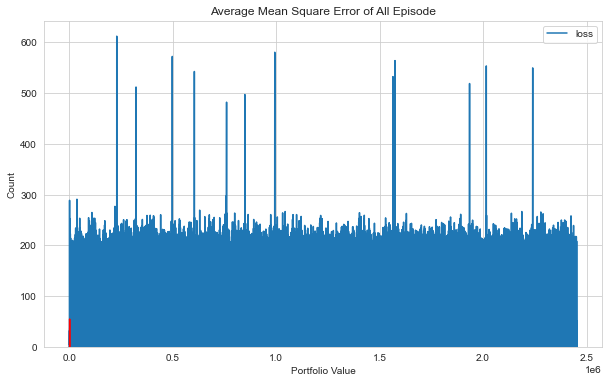

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

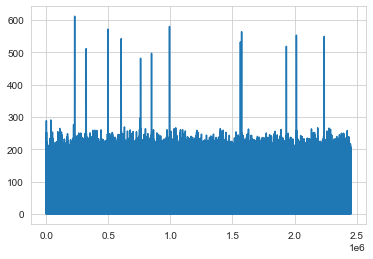

In [5]:
plt.plot(agent.model.losses)

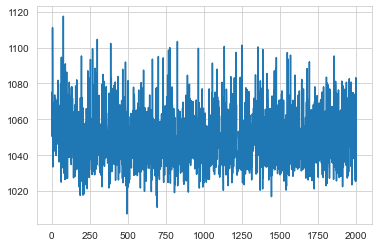

In [6]:
plt.plot(portfolio_value)

episode end value: 845.79, duration: 0:00:00.094022
Sell: 237 times, Buy: 282 times


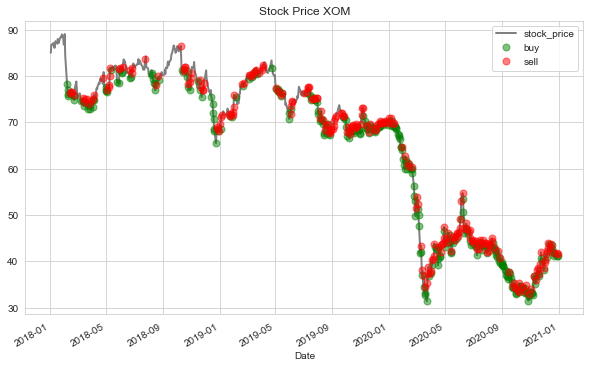

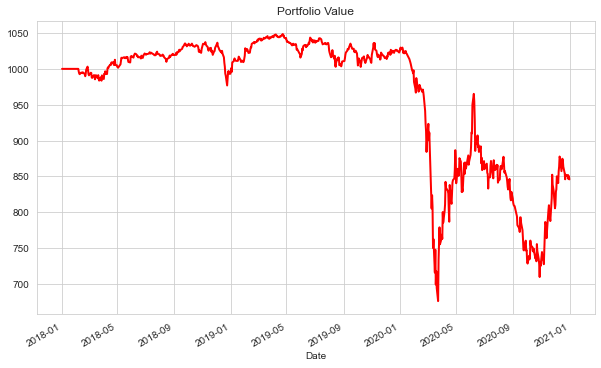

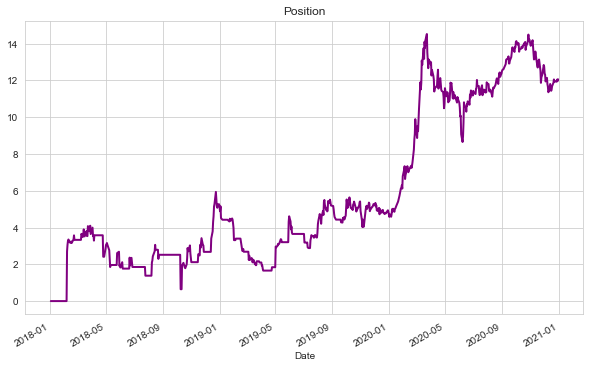

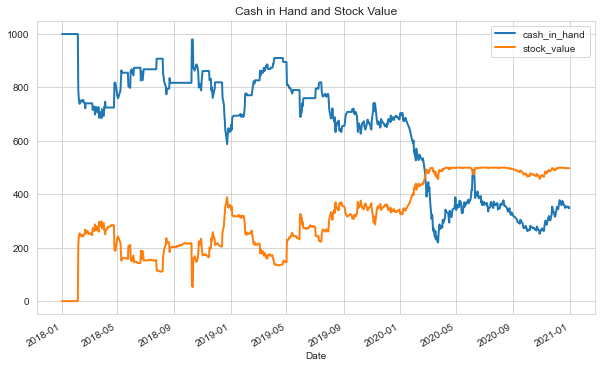

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: XOM
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: -5.43 %
Volatility: 0.1891
shape ratio: -0.3454
Maximun drawdown: -35.54 %
Calmar ratio: -0.1528
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -21.44 %
Volatility (benchmark): 0.3480
shape ratio: -0.6477
Maximun drawdown: -64.69 %
Calmar ratio (benchmark): -0.3315


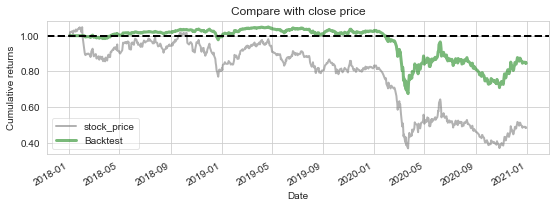

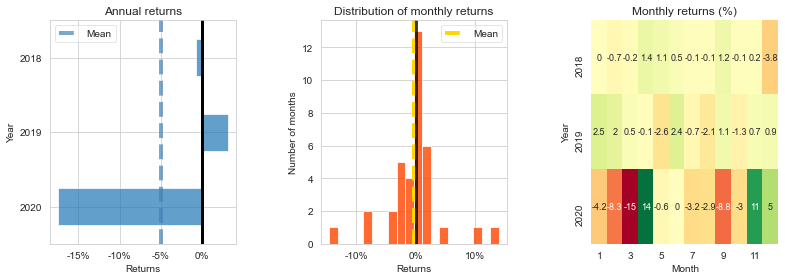

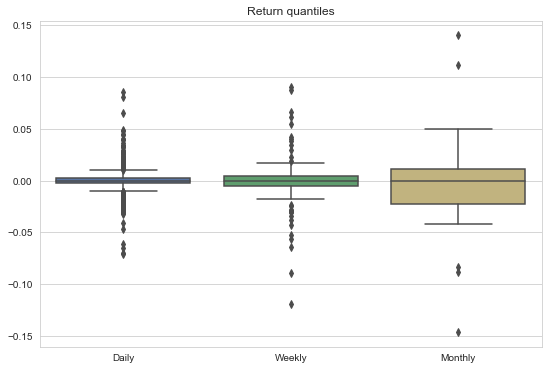

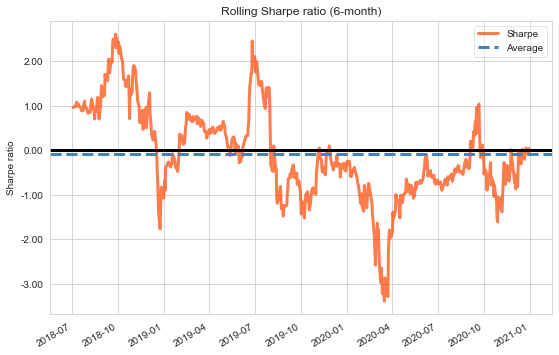

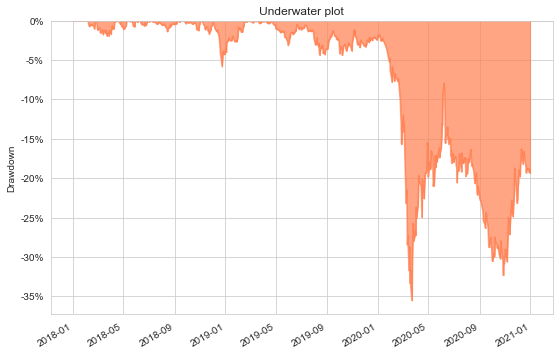

In [11]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')